RQ1. What is the existing knowledge in the literature on the use of generative AI in retail?

In [0]:
%pip install openpyxl

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 6.5 MB/s eta 0:00:00
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
!pip install --upgrade openai  

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.1/599.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.9/352.9 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Not uninstalling typing-extensions at /databricks/python3/lib/python3.10/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-6ae05359-7f12-4452-9e05-cefb96498ef5
    Can't uninstall 'typing_extensions'. No files were found to uninstall.
  Attempting uninstall: openai
    Found existi

In [0]:
%pip install langchain==0.1.20 langchain_core==0.1.52 langchain_community==0.0.38 langchain-openai==0.1.7
# %pip install openai==1.35.3
%pip install --upgrade typing_extensions==4.12.2

dbutils.library.restartPython()

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.8/311.8 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: tiktoken
    Found existing installation: tiktoken 0.5.2
    Not uninstalling tiktoken at /databricks/python3/lib/python3.10/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-6ae05359-7f12-4452-9e05-cefb96498ef5
    Can't uninstall 'tiktoken'. No files were found to uninstall.
  Attem

In [0]:
from pyspark.sql.types import StructType,StructField, StringType, IntegerType
from pyspark.sql.functions import *
from pyspark.sql.functions import concat, col, lit
import pyspark.sql.functions as F
from pyspark.sql.window import Window 
import math
import pandas as pd
import numpy as np
import os
from pyspark.sql.types import *
import pyspark.sql.functions as F
from openai import ChatCompletion
import time
import requests
import asyncio
from tenacity import retry, stop_after_attempt, wait_random_exponential
from concurrent.futures import ThreadPoolExecutor
import nest_asyncio
from langchain_core.prompts import PromptTemplate
import json

In [0]:
# Read paper title from excel file
excel_file = '/Volumes/cmidev/default/preventech/data/user_files/gf591/ML/fads/CleanedTextResearchPapers.xlsx'

from openpyxl import load_workbook  
from openpyxl.utils.dataframe import dataframe_to_rows  
import pandas as pd
workbook = load_workbook(filename=excel_file)  
worksheet = workbook['Sheet1']  
data = worksheet.values  
columns = next(data)  
df_paper_details = pd.DataFrame(data, columns=columns)  

len(df_paper_details)

60

In [0]:
from openpyxl import load_workbook  
from openpyxl.utils.dataframe import dataframe_to_rows  
import pandas as pd
workbook = load_workbook(filename=excel_file)  
worksheet = workbook['Sheet1']  
data = worksheet.values  
columns = next(data)  
df_paper_details = pd.DataFrame(data, columns=columns)  

# Get only rows where 'Status? PDF Extraction' is 'Y'
# df_paper_details = df_paper_details[df_paper_details['Status? PDF Extraction'] == 'Y']
display(df_paper_details.head(3))

EID Title Text_Type path_x Authors Cleaned_Text Total_Length Link 2-s2.0-85215710429 IPL: Leveraging Multimodal Large Language Models for Intelligent Product Listing Columnar dbfs:/Volumes/cmidev/default/preventech/data/user_files/gf591/ML/fads/research_articles/2-s2.0-85215710429.pdf Chen K.; Zhang Q.; Lian C.; Ji Y.; Liu X.; Han S.; Wu G.; Huang F.; Chen J. proceedings of the 2024 conference on empirical methods in natural language processing: industry track , pages 697–711november 12-16, 2024 ©2024 association for computational linguisticsipl: leveraging multimodal large language models for intelligentproduct listingkang chen*,1,2,†qingheng zhang*,1chengbao lian*,1yixin ji1xuwei liu1shuguang han1,‡guoqiang wu1fei huang1jufeng chen11alibaba group2fudan university, {, , ,, , , }@abstractunlike professional business-to-consumer(b2c) e-commerce platforms (., amazon),consumer-to-consumer (c2c) platforms (.,facebook marketplace) are mainly targetingindividual sellers who usually lack sufficientexperience in e-commerce. individual sellersoften struggle to compose proper descriptionsfor selling products. with the recent advance-ment of multimodal large language models(mllms), we attempt to integrate such state-of-the-art generative ai technologies into theproduct listing process. to this end, we developipl, an intelligent product listing tool tailoredto generate descriptions using various productattributes such as category, brand, color, condi-tion, etc. ipl enables users to compose prod-uct descriptions by merely uploading photosof the selling product. more importantly, itcan imitate the content style of our c2c plat-form xianyu1. this is achieved by employingdomain-specific instruction tuning on mllms,and by adopting the multi-modal retrieval-augmented generation (rag) process. a com-prehensive empirical evaluation demonstratesthat the underlying model of ipl significantlyoutperforms the base model in domain-specifictasks while producing less hallucination. iplhas been successfully deployed in our produc-tion system, where 72% of users have their pub-lished product listings based on the generatedcontent, and those product listings are shownto have a quality score % higher than thosewithout ai assistance.1 introductionwith the rise of the circular economy, second-hand e-commerce has played a vital role in ourdaily lives. unlike business-to-consumer (b2c)*these authors contributed equally to this work.†work done during an internship at alibaba group.‡corresponding author: shuguang han (email:)1xianyu is the largest c2c e-commerce platform inchina.figure 1: intelligent product listing on c2c platformse-commerce (., amazon, walmart), second-hand e-commerce is often operating in the form ofconsumer-to-consumer (c2c) transactions. dif-ferent from professional sellers on b2c platforms,individual sellers in second-hand marketplaces areusually inexperienced. they face unique chal-lenges when listing their products — navigatingthrough the complicated listing procedure, and cre-ating high-quality product descriptions. these is-sues not only affect the success rate of productlistings but also impact the overall quality and dis-coverability of the listed products.to address the above issues, it is imperative tosimplify the listing process for individual usersby leveraging automation to generate high-qualityproduct descriptions. a typical product listing pro-cess involves users manually filling in basic prod-uct attributes, uploading product photos, and com-posing content descriptions. among these steps,preparing product photos is relatively straightfor-ward. if we can automatically generate product de-scriptions based on the uploaded photos, it wouldsignificantly reduce the listing effort and enhance697user experience, as illustrated by figure 1.fortunately, product photos contain a wealth ofinformation, enabling us to infer basic attribute in-formation such as category, brand, and model fromthe imagery in most cases. moreover, recent ad-vanc

# RQ1. What is the existing knowledge in the literature on the use of generative AI in retail?

In [0]:
parser_system_prompt = "You are an AI acting as a research assistant, who will be reviewing research papers where usage of generative AI is indicated in retail industry and assist in answering research question as: What is the existing knowledge in the literature on the use of generative AI in retail? Please provide the expected output in the format of {'Existing_Knowledge':['<<provide a list of topics found in the text regarding existing knowledge of use of gen-ai in retail here by separating each topic by a comma >>'],'GenAI_UseCase':'<<list use cases where gen-ai is used here>>','Theme:'<<List themes derived from the text>>','Methodology':'<<list technologies, methods used here>>','Sentiment':'<<Provide sentiment here on customers as positive, negative, neutral, mixed>>' 'Keywords':'<<proide keywords from the abstract that led to existing knowledge'}. If you are not able to understand and articulate any of the required field, leave it blank. Do not generate any additional text or explaination beyond this format."

        
parser_user_prompt = "Example1 Input= {'EID': '2-s2.0-85205122773',  'Cleaned_Text': 'The rapid popularity of ChatGPT has brought generative AI into broad focus. The content generation model represented by AI-generated content (AIGC) has reshaped the advertising industry. This study explores the mechanisms by which the characteristics of AI-generated advertisements affect consumers’ willingness to accept these advertisements from the perspectives of perceived eeriness and perceived intelligence. It found that the verisimilitude and imagination of AI-generated advertisements negatively affect the degree of perceived eeriness by consumers, while synthesis positively affects it. Conversely, verisimilitude, vitality, and imagination positively affect the perceived intelligence, while synthesis negatively affects it. Meanwhile, consumers’ perceived eeriness negatively affects their acceptance of AI-generated advertisements, while perceived intelligence positively affects their willingness to accept AI-generated advertisements. This study helps explain consumers’ attitudes toward AI-generated advertisements and offers strategies for brands and advertisers for how to use AI technology more scientifically to optimize advertisements. Advertisers should cautiously assess the possible impact of AI-generated advertisements according to their characteristics, allowing generative AI to play a more valuable role in advertising. © 2024 by the authors.'}. Expected output is: '{'Existing_Knowledge':['Characteristics of AI-generated advertisements (verisimilitude, vitality, imagination, synthesis)','Consumer attitudes towards AI-generated ads','Influence of AI technology on advertising effectiveness','Complexity of AI's impact on consumer perceptions','Need for further research in understanding AI-generated advertisements'],'GenAI_UseCase':'Content Generation to optimize advertising campaigns and offer strategies', 'Theme':['Consumer Acceptance of AI Ads: Eeriness & Intelligence'],'Methodology':'Text Generation','Sentiment':'Positive','Keywords':'verisimilitude, imagination, synthesis, vitality'}'"

parser_user_prompt_combo = "Please examin given text and generate expected output for below set of input. "

In [0]:
## Converting from dataframe to list representation -- faster than creating a UDF for these tasks
# Convert df_paper_details into a spark dataframe
df_paper_sp = spark.createDataFrame(df_paper_details)
data = df_paper_sp.select(col("EID"), col("Cleaned_Text")).collect()

initial_cal_llm_call_parser = []
for i in data:
    
    initial_cal_llm_call_parser.append({"EID":i['EID'], 
                                        "Cleaned_Text": i['Cleaned_Text']})

print(len(initial_cal_llm_call_parser))

60


In [0]:
def Call_RQ1_LLM(text,eid=0, model=None,tokens=8192):
    import time
     # Wait time
    time.sleep(5)
    

    from openai import OpenAI
    import os
    # Set the OpenAI API key as an environment variable
    DATABRICKS_TOKEN = dbutils.notebook.entry_point.getDbutils().notebook().getContext().apiToken().get()

    os.environ['OPENAI_API_KEY'] = DATABRICKS_TOKEN#os.environ.get('DATABRICKS_TOKEN')

    client = OpenAI(
    api_key=os.environ['OPENAI_API_KEY'],
    base_url="https://adb-7018564609060221.1.azuredatabricks.net/serving-endpoints"
    )

    chat_completion = client.chat.completions.create(
    messages=[        
        {"role": "system", "content": parser_system_prompt +" "+ parser_user_prompt},
        {"role": "user", "content": parser_user_prompt_combo + " " + text}

    ],
    # model="databricks-mixtral-8x7b-instruct",
    model=model,

    # max_tokens=28000
    max_tokens=tokens
    )

    output_text = (chat_completion.choices[0].message.content)
    print("original output:", output_text)

    # options = options.replace("\\", "")
    try:
        ## Extract Label, Themes and Reference fields from the output and create a datagrame
        # # Convert the string to a dictionary
        
        output_dict = json.loads(output_text.replace("'", "\""))

        # # Create a Row object
        row = Row(EID=eid, Existing_Knowledge=output_dict['Existing_Knowledge'],
                  GenAI_UseCase=output_dict['GenAI_UseCase'],
                  Theme=output_dict['Theme'],
                  Methodology = output_dict['Methodology'],
                  Sentiment=output_dict['Sentiment'], 
                  Keywords=output_dict['Keywords'])
    except:
        row = Row(EID=eid, Existing_Knowledge=None,Theme=None,GenAI_UseCase=None, Methodology=None, Sentiment=None, Keywords=None)
    # print(row)
    return row


In [0]:
# def Call_RQ1_LLM(text,eid=0, model=None,tokens=8192):
#     import time
#      # Wait time
#     time.sleep(5)
    

#     from openai import OpenAI
#     import os
#     # Set the OpenAI API key as an environment variable
#     DATABRICKS_TOKEN = dbutils.notebook.entry_point.getDbutils().notebook().getContext().apiToken().get()

#     os.environ['OPENAI_API_KEY'] = DATABRICKS_TOKEN#os.environ.get('DATABRICKS_TOKEN')

#     client = OpenAI(
#     api_key=os.environ['OPENAI_API_KEY'],
#     base_url="https://adb-7018564609060221.1.azuredatabricks.net/serving-endpoints"
#     )

#     chat_completion = client.chat.completions.create(
#     messages=[        
#         {"role": "system", "content": parser_system_prompt +" "+ parser_user_prompt},
#         {"role": "user", "content": parser_user_prompt_combo + " " + text}

#     ],
#     # model="databricks-mixtral-8x7b-instruct",
#     model=model,

#     # max_tokens=28000
#     max_tokens=tokens
#     )

#     output_text = (chat_completion.choices[0].message.content)
#     # print("original output:", output_text)

#     # options = options.replace("\\", "")
#     try:
#         ## Extract Label, Themes and Reference fields from the output and create a datagrame
#         # # Convert the string to a dictionary
        
#         output_dict = json.loads(output_text.replace("'", "\""))

#         # # Create a Row object
#         row = Row(EID=eid, Existing_Knowledge=output_dict['Existing_Knowledge'],
#                   Theme=output_dict['Theme'])
#     except:
#         row = Row(EID=eid, Existing_Knowledge=None,Theme=None)
#     # print(row)
#     return row


In [0]:
a = initial_cal_llm_call_parser[-1]
# b = str(a).replace("'", '"')
#Mixtral
model_mixtral = "databricks-mixtral-8x7b-instruct"
# combo = CallParserLLM(str(a),eid=0,model=model_mixtral, tokens=28000)

#Llama 3
model_llama="databricks-meta-llama-3-3-70b-instruct"
# combo = Call_RQ1_LLM(str(a),eid=0,model=model_llama, tokens=8192)
# print(combo)

In [0]:
id = [row.EID for row in df_paper_sp.select('EID').collect()]
result = []
ids=[]

#set random seed for reproducibility of results
import random
random.seed(42)

In [0]:
from pyspark.sql.types import StructType, StructField, StringType

# Define the schema
schema = StructType([
    StructField("EID", StringType(), True),
    StructField("Existing_Knowledge", StringType(), True),
    StructField("GenAI_UseCase", StringType(), True),
    StructField("Theme", StringType(), True),
    StructField("Methodology", StringType(), True),
    StructField("Sentiment", StringType(), True),
    StructField("Keywords", StringType(), True)
    # Add other fields as necessary
])

for i in range(len(initial_cal_llm_call_parser)):
# for i in range(5):

    # print(i)
    print(id[i])
    a = initial_cal_llm_call_parser[i]
    try:
        #Llama 3 model
        combo = Call_RQ1_LLM(str(a),eid=id[i],model=model_llama, tokens=8192)
    except:
        combo = Call_RQ1_LLM(str(a),eid=id[i],model=model_mixtral, tokens=10000)

    combo_data = [(combo.EID, combo.Existing_Knowledge,
                   combo.GenAI_UseCase, 
                   combo.Theme,
                   combo.Methodology, 
                   combo.Sentiment,
                   combo.Keywords)]
    combo_df = spark.createDataFrame(combo_data, schema)
    if i == 0:
        final_df = combo_df
    else:
        final_df = final_df.union(combo_df)
    # result.append(combo)
    # ids.append(id[i])

display(final_df)

2-s2.0-85215710429
original output: {'Existing_Knowledge':['Generative AI in e-commerce', 'Multimodal large language models for product listing', 'Intelligent product listing tools', 'Domain-specific instruction tuning', 'Multi-modal retrieval-augmented generation', 'Hallucination problem in large language models', 'Deployment of generative AI in production systems', 'Evaluation metrics for generative AI'], 
'GenAI_UseCase':'Content Generation for product listings, Product description generation, Intelligent product listing', 
'Theme':['E-commerce', 'Product Listing', 'Generative AI', 'Multimodal Large Language Models'], 
'Methodology':['Multimodal Large Language Models', 'Domain-specific instruction tuning', 'Multi-modal retrieval-augmented generation', 'Model quantization', 'Vit operation optimization'], 
'Sentiment':'Positive', 
'Keywords':'Generative AI, E-commerce, Multimodal large language models, Intelligent product listing, Product description generation'}
2-s2.0-85214920027
or

EID,Existing_Knowledge,GenAI_UseCase,Theme,Methodology,Sentiment,Keywords
2-s2.0-85215710429,"[Generative AI in e-commerce, Multimodal large language models for product listing, Intelligent product listing tools, Domain-specific instruction tuning, Multi-modal retrieval-augmented generation, Hallucination problem in large language models, Deployment of generative AI in production systems, Evaluation metrics for generative AI]","Content Generation for product listings, Product description generation, Intelligent product listing","[E-commerce, Product Listing, Generative AI, Multimodal Large Language Models]","[Multimodal Large Language Models, Domain-specific instruction tuning, Multi-modal retrieval-augmented generation, Model quantization, Vit operation optimization]",Positive,"Generative AI, E-commerce, Multimodal large language models, Intelligent product listing, Product description generation"
2-s2.0-85214920027,"[Influence of AI disclosure on consumer trust and attitudes towards service ads, Effect of AI-generated content on service tangibilization, Importance of transparency in AI disclosure labels, Role of source credibility theory in understanding consumer attitudes towards AI-generated ads, Impact of AI disclosure on consumer perceptions of service quality and reliability, Influence of service ad focus on consumer trust and attitudes, Effect of AI-generated intangible attributes on consumer trust and attitudes, Importance of selectively using AI to generate tangible attributes in service ads]","Content Generation for service advertising, optimizing performance and efficiency in ad development","[Consumer Trust and Attitudes towards AI-generated Service Ads, Service Tangibilization and AI Disclosure, Transparency and Source Credibility in AI-generated Ads]","Experimental design, surveys, and statistical analysis",Mixed,"Generative AI, Services Advertising, Tangibilization, Source Credibility, Trust, Transparency, AI Disclosure"
2-s2.0-85202175578,"[Use of generative AI in digital marketing for performance prediction and attribution, Application of explainable AI to understand consumer behavior, Role of deep feature attribution in understanding image-based digital creative assets, Importance of feature extraction and predictive modeling in advertising, Use of transformer models for image segmentation and generation]",Content generation and manipulation for advertising and marketing,"[Explainable AI in Digital Marketing, Performance Prediction and Attribution in Advertising]","[Deep Learning, Transformer Models, Stable Diffusion, ControlNet, XGBoost]",Positive,"generative AI, explainable AI, digital marketing, performance prediction, attribution, deep feature attribution, transformer models, stable diffusion, controlnet, xgboost"
2-s2.0-85200833840,"[Green marketing strategies and their impact on consumer behavior, Role of green attitude in mediating the relationship between green marketing strategies and purchase intention, Influence of generative AI on consumer behavior and purchase intentions, Importance of green packaging, labeling, and advertising in shaping consumer attitudes and intentions, Value-belief-norm theory and theory of planned behavior in understanding consumer behavior]","Enhancing the relationship between green attitude and purchase intention, providing personalized recommendations and reviews to consumers","[Green marketing strategies and consumer behavior, Role of generative AI in shaping consumer behavior]","Quantitative research approach, partial least squares-structural equation modeling (PLS-SEM), survey methodology",Positive,"Green marketing, generative AI, consumer behavior, purchase intention, green attitude"
2-s2.0-85187495340,null,null,null,null,null,null
2-s2.0-85210022786,"[Generative AI in industrial social and e-commerce recommendation systems, Landing Generative AI in real-world applications, Personalized recommendations with foundation models, Integration of curation capabilities into

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

In [0]:
# Write the cleaned dataframe to a local Excel file
local_path = '/tmp/fads_rq1_existing_knowledge_themese.xlsx'
final_df.toPandas().to_excel(local_path, index=False)

# Move the local file to the desired location using Databricks utilities
dbutils.fs.mv(f'file:{local_path}', '/Volumes/cmidev/default/preventech/data/user_files/gf591/ML/fads/fads_rq1_existing_knowledge_themese.xlsx')

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2487505190770571>, line 3
      1 # Write the cleaned dataframe to a local Excel file
      2 local_path = '/tmp/fads_rq1_existing_knowledge_themese.xlsx'
----> 3 final_df.toPandas().to_excel(local_path, index=False)
      5 # Move the local file to the desired location using Databricks utilities
      6 dbutils.fs.mv(f'file:{local_path}', '/Volumes/cmidev/default/preventech/data/user_files/gf591/ML/fads/fads_rq1_existing_knowledge_themese.xlsx')

NameError: name 'final_df' is not defined

## Read stored themes from file

In [0]:
results='/Volumes/cmidev/default/preventech/data/user_files/gf591/ML/fads/fads_rq1_existing_knowledge_themese.xlsx'
final_df=pd.read_excel(results)
final_df = spark.createDataFrame(final_df)

In [0]:
display(final_df.head(3))

EID,Existing_Knowledge,GenAI_UseCase,Theme,Methodology,Sentiment,Keywords
2-s2.0-85215710429,"[Generative AI in e-commerce, Multimodal large language models for product listing, Intelligent product listing tools, Domain-specific instruction tuning, Multi-modal retrieval-augmented generation, Hallucination problem in large language models, Deployment of generative AI in production systems, Evaluation metrics for generative AI]","Content Generation for product listings, Product description generation, Intelligent product listing","[E-commerce, Product Listing, Generative AI, Multimodal Large Language Models]","[Multimodal Large Language Models, Domain-specific instruction tuning, Multi-modal retrieval-augmented generation, Model quantization, Vit operation optimization]",Positive,"Generative AI, E-commerce, Multimodal large language models, Intelligent product listing, Product description generation"
2-s2.0-85214920027,"[Influence of AI disclosure on consumer trust and attitudes towards service ads, Effect of AI-generated content on service tangibilization, Importance of transparency in AI disclosure labels, Role of source credibility theory in understanding consumer attitudes towards AI-generated ads, Impact of AI disclosure on consumer perceptions of service quality and reliability, Influence of service ad focus on consumer trust and attitudes, Effect of AI-generated intangible attributes on consumer trust and attitudes, Importance of selectively using AI to generate tangible attributes in service ads]","Content Generation for service advertising, optimizing performance and efficiency in ad development","[Consumer Trust and Attitudes towards AI-generated Service Ads, Service Tangibilization and AI Disclosure, Transparency and Source Credibility in AI-generated Ads]","Experimental design, surveys, and statistical analysis",Mixed,"Generative AI, Services Advertising, Tangibilization, Source Credibility, Trust, Transparency, AI Disclosure"
2-s2.0-85202175578,"[Use of generative AI in digital marketing for performance prediction and attribution, Application of explainable AI to understand consumer behavior, Role of deep feature attribution in understanding image-based digital creative assets, Importance of feature extraction and predictive modeling in advertising, Use of transformer models for image segmentation and generation]",Content generation and manipulation for advertising and marketing,"[Explainable AI in Digital Marketing, Performance Prediction and Attribution in Advertising]","[Deep Learning, Transformer Models, Stable Diffusion, ControlNet, XGBoost]",Positive,"generative AI, explainable AI, digital marketing, performance prediction, attribution, deep feature attribution, transformer models, stable diffusion, controlnet, xgboost"


In [0]:
final_df.columns

['EID',
 'Existing_Knowledge',
 'GenAI_UseCase',
 'Theme',
 'Methodology',
 'Sentiment',
 'Keywords']

## Explode GenAI_UseCase

In [0]:
from pyspark.sql.functions import explode, split, col
from collections import Counter
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk

# # Download the WordNet resource
# nltk.download('wordnet')

# Explode the 'Theme' column
# exploded_df = final_df.withColumn("GenAI_UseCase", explode(split(col("GenAI_UseCase"), ",")))
exploded_df = final_df.withColumn("GenAI_UseCase", explode(split(col("GenAI_UseCase"), "and ")))
exploded_df = exploded_df.withColumn("GenAI_UseCase", explode(split(col("GenAI_UseCase"), ",")))

# Convert the exploded DataFrame to a list
GenAI_UseCase_list = exploded_df.select("GenAI_UseCase").rdd.flatMap(lambda x: x).collect()

GenAI_UseCase = []
for i in GenAI_UseCase_list:
    if '[' in i or ']' in i:
        i = i.replace('[', '').replace(']', '')
    #If i starts with 'and', then remove it
    # if i.startswith('and'):
    #     i = i.replace('and', '')
    GenAI_UseCase.append(i.strip().lower())

# Sort themes alphabetically
GenAI_UseCase.sort()

# # Calculate count of each item
# themes_count = Counter(themes)

# # Convert to a DataFrame for easier plotting
# themes_df = spark.createDataFrame(themes_count.items(), ["Theme", "Count"])

# # Order by count in descending order
# themes_df = themes_df.orderBy(themes_df['Count'].desc())


# # Display the DataFrame
# display(themes_df)

# Convert themes to a list of tuples
# GenAI_UseCase_tuples = [(usecase,) for usecase in GenAI_UseCase ]
GenAI_UseCase_tuples = []  # Initialize the list
for usecase in GenAI_UseCase:
    if usecase.startswith('and'):
        usecase = usecase.replace('and', '')
        print(usecase)
    if len(usecase) >=3 :
        GenAI_UseCase_tuples.append((usecase,))
print("---------",GenAI_UseCase_tuples)
# Assign usecases to df
GenAI_UseCase_df = spark.createDataFrame(GenAI_UseCase_tuples, ["GenAI_UseCase"])

# Display the DataFrame
display(GenAI_UseCase_df)

--------- [('active feedback loops',), ('advertising',), ('advertising',), ('advertising',), ('ai-assisted design process',), ('ai-assisted design process in fashion industry',), ('ai-generated content for personalized advertising',), ('ai-generated fashion products',), ('animation',), ('automating existing services',), ('autonomous checkout solutions',), ('business decision support',), ('business process automation',), ('chat assistance',), ('chatbot',), ('chatbot adoption',), ('chatbot interactions',), ('chatbot-based customer support',), ('chatbots',), ('chatbots',), ('chatbots',), ('chatbots',), ('chatbots for customer inquiries',), ('co-creation of advertisements with consumers',), ('co-ideation',), ('computer vision for image processing',), ('consumer behavior analysis',), ('consumer research',), ('content creation',), ('content creation',), ('content creation',), ('content generation',), ('content generation',), ('content generation',), ('content generation',), ('content generat

GenAI_UseCase
active feedback loops
advertising
advertising
advertising
ai-assisted design process
ai-assisted design process in fashion industry
ai-generated content for personalized advertising
ai-generated fashion products
animation
automating existing services


Databricks visualization. Run in Databricks to view.

## Explode Themes

In [0]:
from pyspark.sql.functions import explode, split, col
from collections import Counter
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk

# # Download the WordNet resource
# nltk.download('wordnet')

# Explode the 'Theme' column
exploded_df = final_df.withColumn("Theme", explode(split(col("Theme"), ",")))

# Convert the exploded DataFrame to a list
themes_list = exploded_df.select("Theme").rdd.flatMap(lambda x: x).collect()

themes = []
for i in themes_list:
    if '[' in i or ']' in i:
        i = i.replace('[', '').replace(']', '')
    themes.append(i.strip().lower())

# Sort themes alphabetically
themes.sort()

# # Calculate count of each item
# themes_count = Counter(themes)

# # Convert to a DataFrame for easier plotting
# themes_df = spark.createDataFrame(themes_count.items(), ["Theme", "Count"])

# # Order by count in descending order
# themes_df = themes_df.orderBy(themes_df['Count'].desc())


# # Display the DataFrame
# display(themes_df)

# Convert themes to a list of tuples
themes_tuples = [(theme,) for theme in themes]

# Assign themes to themes_df
themes_df = spark.createDataFrame(themes_tuples, ["Theme"])

# Display the DataFrame
display(themes_df)

Theme
adoption of gen-ai in retail industry
adoption of generative ai in marketing
advantages and challenges of adopting generative ai
advertising using generative ai
ai adoption in marketing
ai hallucination and its implications
ai in marketing
ai in marketing
ai-driven fashion assistant
ai-driven marketing and branding


In [0]:

# from pyspark.sql.functions import explode, split, col
# from collections import Counter
# from pyspark.sql.functions import udf
# from pyspark.sql.types import ArrayType, StringType
# from nltk.stem import PorterStemmer
# from nltk.stem import WordNetLemmatizer
# import nltk

# # # Download the WordNet resource
# # nltk.download('wordnet')

# # Explode the 'Theme' column
# exploded_df = final_df.withColumn("Theme", explode(split(col("Theme"), ",")))

# # Convert the exploded DataFrame to a list
# themes_list = exploded_df.select("Theme").rdd.flatMap(lambda x: x).collect()

# themes = []
# for i in themes_list:
#     if '[' in i or ']' in i:
#         i = i.replace('[', '').replace(']', '')
#     themes.append(i.strip().lower())

# # Sort themes alphabetically
# themes.sort()

# # # Calculate count of each item
# # themes_count = Counter(themes)

# # # Convert to a DataFrame for easier plotting
# # themes_df = spark.createDataFrame(themes_count.items(), ["Theme", "Count"])

# # # Order by count in descending order
# # themes_df = themes_df.orderBy(themes_df['Count'].desc())


# # # Display the DataFrame
# # display(themes_df)


In [0]:
# Drop rows that do not indicate a theme
drop_themes = ['generative ai in retail','generative ai','technical overview of genai','tourism marketing','role of ai in retail','retail applications of nlp and generative ai','retail technology','role of ai in retail','gpt-3 model','natural language processing (nlp)','opportunities and challenges of gai','generative ai in tourism','gai in various industries','future of work in the age of ai','gen-ai in retail','deep learning','data management','artificial intelligence']
themes_df = themes_df.filter(~themes_df.Theme.isin(drop_themes))

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [0]:
%pip install spacy  
!python -m spacy download en_core_web_sm  

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.2 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Lemmatization on raw gen-ai Use Cases

In [0]:
import spacy  

# Load the Spacy model  
nlp = spacy.load("en_core_web_sm")  

# Function to lemmatize a theme  
def lemmatize_uc(theme):  
    doc = nlp(theme)  
    lemmatized_words = [token.lemma_ for token in doc]  
    return ' '.join(lemmatized_words)  

# List of themes  
# themes = ["running fast", "cats and dogs", "better performances", "jumping high"]  
# themes
usecases = GenAI_UseCase_df.select("GenAI_UseCase").rdd.flatMap(lambda x: x).collect()

# Lemmatize each theme in the list  
lemmatized_usecases = [lemmatize_uc(uc) for uc in usecases]  
lemmatized_usecases = sorted(lemmatized_usecases)
print((lemmatized_usecases))

['active feedback loop', 'advertise', 'advertise', 'advertise', 'ai - assist design process', 'ai - assist design process in fashion industry', 'ai - generate content for personalized advertising', 'ai - generate fashion product', 'animation', 'automate exist service', 'autonomous checkout solution', 'business decision support', 'business process automation', 'chat assistance', 'chatbot', 'chatbot', 'chatbot', 'chatbot', 'chatbot', 'chatbot - base customer support', 'chatbot adoption', 'chatbot for customer inquiry', 'chatbot interaction', 'co - creation of advertisement with consumer', 'co - ideation', 'computer vision for image processing', 'consumer behavior analysis', 'consumer research', 'content creation', 'content creation', 'content creation', 'content generation', 'content generation', 'content generation', 'content generation', 'content generation', 'content generation', 'content generation', 'content generation', 'content generation', 'content generation', 'content generatio

## Perform lemmatization on raw themes

In [0]:
import spacy  

# Load the Spacy model  
nlp = spacy.load("en_core_web_sm")  

# Function to lemmatize a theme  
def lemmatize_theme(theme):  
    doc = nlp(theme)  
    lemmatized_words = [token.lemma_ for token in doc]  
    return ' '.join(lemmatized_words)  

# List of themes  
# themes = ["running fast", "cats and dogs", "better performances", "jumping high"]  
# themes
themes = themes_df.select("Theme").rdd.flatMap(lambda x: x).collect()

# Lemmatize each theme in the list  
lemmatized_themes = [lemmatize_theme(theme) for theme in themes]  
lemmatized_themes = sorted(lemmatized_themes)
print((lemmatized_themes))

['adoption of gen - ai in retail industry', 'adoption of generative ai in marketing', 'advantage and challenge of adopt generative ai', 'advertising use generative ai', 'ai - drive fashion assistant', 'ai - drive marketing and branding', 'ai - drive marketing strategy', 'ai - drive technology in retail', 'ai - empower creativity', 'ai - enable service quality and competence', 'ai - powered service', 'ai adoption in marketing', 'ai hallucination and its implication', 'ai in marketing', 'ai in marketing', 'and authenticity', 'and post - purchase stage', 'anthropomorphism and efficiency', 'application of ai and ml in online fashion retail', 'application of machine learning and llm in sentiment analysis', 'artificial intelligence in fraud detection', 'automate email management', 'behavioral reasoning theory in ai', 'business behaviour analysis', 'challenge and limitation of generative ai in retail', 'chatbot adoption in retail : pre - purchase', 'co - creation and genai', 'community develo

## Get count of Gen-AI UseCases

In [0]:
from pyspark.sql.types import StringType

# Assuming lemmatized_usecases is a list of strings
usecases_df = spark.createDataFrame(lemmatized_usecases, StringType()).toDF("GenAI_UseCase")

# Add count of each GenAI_UseCase and add that as a new column
# usecases_df = usecases_df.withColumn("Count", F.size(F.split(col("GenAI_UseCase"), ",")))
# # # Calculate count of each item
lemmatized_usecases_count = Counter(lemmatized_usecases)

# # # Convert to a DataFrame for easier plotting
usecases_cnt_df = spark.createDataFrame(lemmatized_usecases_count.items(), ["GenAI_UseCase", "Count"])

# # # Order by count in descending order
# # themes_df = themes_df.orderBy(themes_df['Count'].desc())
usecases_cnt_df=usecases_cnt_df.orderBy(usecases_cnt_df['Count'].desc())
usecases_cnt_df= usecases_cnt_df.dropna()
display(usecases_cnt_df)


GenAI_UseCase,Count
content generation,15
customer service,9
chatbot,5
personalization,4
virtual assistant,3
personalize recommendation,3
marketing automation,3
content creation,3
marketing strategy,3
advertise,3


Databricks visualization. Run in Databricks to view.

In [0]:
from pyspark.sql.functions import when, col, count

# Drop count column from usecases_cnt_df
usecases_cnt_df = usecases_cnt_df.drop("Count")

# Update GenAI_UseCase column based on conditions
usecases_cnt_df = usecases_cnt_df.withColumn(
    "GenAI_UseCase",
    when(col("GenAI_UseCase").contains("content"), "content generation").otherwise(col("GenAI_UseCase"))
)

usecases_cnt_df = usecases_cnt_df.withColumn(
    "GenAI_UseCase",when(col("GenAI_UseCase").contains("personaliz"), "personalization").otherwise(col("GenAI_UseCase"))
)


usecases_cnt_df = usecases_cnt_df.withColumn(
    "GenAI_UseCase",
    when(col("GenAI_UseCase").contains("chat"), "chatbot").otherwise(col("GenAI_UseCase"))
)

usecases_cnt_df = usecases_cnt_df.withColumn(
    "GenAI_UseCase",
    when(col("GenAI_UseCase").contains("customer"), "customer service").otherwise(col("GenAI_UseCase"))
)

# Group by GenAI_UseCase and count occurrences
usecases_cnt_df = usecases_cnt_df.groupBy("GenAI_UseCase").agg(count("*").alias("Count"))

# Order by count in descending order and drop null values
usecases_cnt_df = usecases_cnt_df.orderBy(col("Count").desc()).dropna()

# Display the DataFrame
display(usecases_cnt_df)

GenAI_UseCase,Count
content generation,27
personalization,12
customer service,8
chatbot,6
advertise,1
active feedback loop,1
ai - assist design process,1
automate exist service,1
animation,1
autonomous checkout solution,1


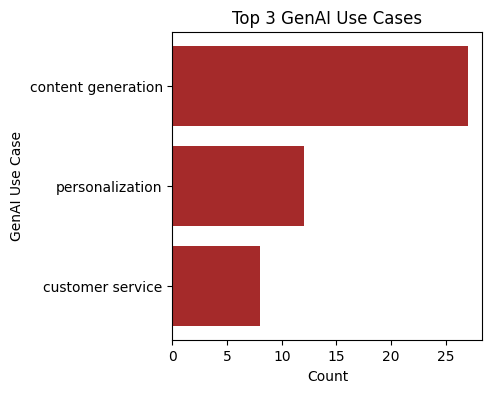

In [0]:
import matplotlib.pyplot as plt

# Convert to Pandas DataFrame for plotting
usecases_cnt_pd = usecases_cnt_df.limit(3).toPandas()

# Plotting
plt.figure(figsize=(4, 4))

plt.barh(usecases_cnt_pd['GenAI_UseCase'], usecases_cnt_pd['Count'], color='brown')
plt.xlabel('Count')
plt.ylabel('GenAI Use Case')
plt.title('Top 3 GenAI Use Cases')
plt.gca().invert_yaxis()
plt.show()

## Topic Modeling on Lemmatized Themes

In [0]:
display(themes_df)

Theme
adoption of gen-ai in retail industry
adoption of generative ai in marketing
advantages and challenges of adopting generative ai
advertising using generative ai
ai adoption in marketing
ai hallucination and its implications
ai in marketing
ai in marketing
ai-driven fashion assistant
ai-driven marketing and branding


In [0]:
from pyspark.sql.functions import size, split

themes_df = themes_df.withColumn("word_len", size(split(col("Theme"), " ")))
display(themes_df)

Theme,word_len
adoption of gen-ai in retail industry,6
adoption of generative ai in marketing,6
advantages and challenges of adopting generative ai,7
advertising using generative ai,4
ai adoption in marketing,4
ai hallucination and its implications,5
ai in marketing,3
ai in marketing,3
ai-driven fashion assistant,3
ai-driven marketing and branding,4


In [0]:
usecases_cnt_df.columns

['GenAI_UseCase', 'Count']

In [0]:
## Get length of each row in usecases_df
from pyspark.sql.functions import size, split

usecases_df = usecases_df.withColumn("word_len", size(split(col("GenAI_UseCase"), " ")))
display(usecases_df)

GenAI_UseCase,word_len
active feedback loop,3
advertise,1
advertise,1
advertise,1
ai - assist design process,5
ai - assist design process in fashion industry,8
ai - generate content for personalized advertising,7
ai - generate fashion product,5
animation,1
automate exist service,3


In [0]:
## Add a space or AND word after each theme when the theme has a single word so that it will be counted in bigrams
# Identify rows with single word in 'Themes' column  
single_word_rows = themes_df.toPandas()
  
# Update the 'Themes' column for single word rows  
# single_word_rows = themes_df.withColumn('Theme', when((col('word_len')) <= 1, col('Theme') + ' ').otherwise(col('Theme')))  
themes = single_word_rows['Theme'].tolist()
words = single_word_rows['word_len'].tolist()
new_themes = []
for theme, word in zip(themes, words):
  if word == 1:
    new_themes.append(theme + ' and')
  else:
    new_themes.append(theme)

#Assign new_themes to themes column in single_word_rows
single_word_rows['Theme'] = new_themes
#convert single_word_rows to a spark df
single_word_rows = spark.createDataFrame(single_word_rows)
# single_word_rows = single_word_rows.withColumn('Theme',  
#                                                when(col('word_len') == 1, concat(col('Theme'), col('word_len'))).otherwise(col('Theme'))) 

display(single_word_rows)

Theme,word_len
adoption of gen-ai in retail industry,6
adoption of generative ai in marketing,6
advantages and challenges of adopting generative ai,7
advertising using generative ai,4
ai adoption in marketing,4
ai hallucination and its implications,5
ai in marketing,3
ai in marketing,3
ai-driven fashion assistant,3
ai-driven marketing and branding,4


In [0]:
from pyspark.ml.feature import Tokenizer, HashingTF, IDF, NGram, MinMaxScaler,StandardScaler
from pyspark.ml import Pipeline
from pyspark.sql.functions import col, when, size

# Tokenize the Theme column
tokenizer = Tokenizer(inputCol="Theme", outputCol="words")

# Generate bi-grams and tri-grams
bigrams = NGram(n=2, inputCol="words", outputCol="bigrams")
trigrams = NGram(n=3, inputCol="words", outputCol="trigrams")


# Apply HashingTF to get term frequency vectors
hashingTF = HashingTF(inputCol="bigrams", outputCol="rawFeatures", numFeatures=20)

# Apply IDF to get TF-IDF vectors
idf = IDF(inputCol="rawFeatures", outputCol="features")

# Apply MinMaxScaler to scale the features
# scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")

#Apply standard scalar on features column
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

# Create a pipeline with tokenizer, ngram, hashingTF, idf, and scaler
pipeline = Pipeline(stages=[tokenizer, bigrams, trigrams, hashingTF, idf, scaler])

# Fit the pipeline to the data
pipeline_model = pipeline.fit(single_word_rows)

# Transform the data
themes_tfidf_df = pipeline_model.transform(single_word_rows)

# Display the transformed DataFrame
display(themes_tfidf_df)

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Theme,word_len,words,bigrams,trigrams,rawFeatures,features,scaledFeatures
adoption of gen-ai in retail industry,6,"List(adoption, of, gen-ai, in, retail, industry)","List(adoption of, of gen-ai, gen-ai in, in retail, retail industry)","List(adoption of gen-ai, of gen-ai in, gen-ai in retail, in retail industry)","Map(vectorType -> sparse, length -> 20, indices -> List(0, 10, 13, 15), values -> List(1.0, 1.0, 2.0, 1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(0, 10, 13, 15), values -> List(1.8144877203056111, 1.6264354888026713, 3.6289754406112222, 2.137261112568662))","Map(vectorType -> sparse, length -> 20, indices -> List(0, 10, 13, 15), values -> List(2.3611021048667715, 2.037223545951464, 4.409039077284686, 2.750424930744344))"
adoption of generative ai in marketing,6,"List(adoption, of, generative, ai, in, marketing)","List(adoption of, of generative, generative ai, ai in, in marketing)","List(adoption of generative, of generative ai, generative ai in, ai in marketing)","Map(vectorType -> sparse, length -> 20, indices -> List(0, 1, 10, 12, 13), values -> List(1.0, 1.0, 1.0, 1.0, 1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(0, 1, 10, 12, 13), values -> List(1.8144877203056111, 1.5441973905656994, 1.6264354888026713, 2.0462893343629354, 1.8144877203056111))","Map(vectorType -> sparse, length -> 20, indices -> List(0, 1, 10, 12, 13), values -> List(2.3611021048667715, 2.0462396668507696, 2.037223545951464, 3.022496297924572, 2.204519538642343))"
advantages and challenges of adopting generative ai,7,"List(advantages, and, challenges, of, adopting, generative, ai)","List(advantages and, and challenges, challenges of, of adopting, adopting generative, generative ai)","List(advantages and challenges, and challenges of, challenges of adopting, of adopting generative, adopting generative ai)","Map(vectorType -> sparse, length -> 20, indices -> List(1, 3, 4, 7, 8, 13), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(1, 3, 4, 7, 8, 13), values -> List(1.5441973905656994, 1.5708656376478607, 1.8144877203056111, 1.7805861686299298, 2.186051276738094, 1.8144877203056111))","Map(vectorType -> sparse, length -> 20, indices -> List(1, 3, 4, 7, 8, 13), values -> List(2.0462396668507696, 2.2804972658682847, 2.58942516520205, 2.3373801989230985, 2.6393201271260356, 2.204519538642343))"
advertising using generative ai,4,"List(advertising, using, generative, ai)","List(advertising using, using generative, generative ai)","List(advertising using generative, using generative ai)","Map(vectorType -> sparse, length -> 20, indices -> List(1, 11, 15), values -> List(1.0, 1.0, 1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(1, 11, 15), values -> List(1.5441973905656994, 1.8144877203056111, 2.137261112568662))","Map(vectorType -> sparse, length -> 20, indices -> List(1, 11, 15), values -> List(2.0462396668507696, 2.268036470599249, 2.750424930744344))"
ai adoption in marketing,4,"List(ai, adoption, in, marketing)","List(ai adoption, adoption in, in marketing)","List(ai adoption in, adoption in marketing)","Map(vectorType -> sparse, length -> 20, indices -> List(6, 9, 13), values -> List(1.0, 1.0, 1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(6, 9, 13), values -> List(1.5982646118359751, 1.8859466842877561, 1.8144877203056111))","Map(vectorType -> sparse, length -> 20, indices -> List(6, 9, 13), values -> List(2.024053152104961, 2.5265800120671122, 2.204519538642343))"
ai hallucination and its implications,5,"List(ai, hallucination, and, its, implications)","List(ai hallucination, hallucination and, and its, its implications)","List(ai hallucination and, hallucination and its, and its implications)","Map(vectorType -> sparse, length -> 20, indices -> List(7, 10, 12, 18), values -> List(1.0, 1.0, 1.0, 1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(7, 10, 12, 18), values -> List(1.7805861686299298, 1.626435488802

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from builtins import max

In [0]:


# Define hyperparameters
k_values = range(2, 11)
silhouette_scores = []

# Evaluate KMeans++ for different values of k
for k in k_values:
    kmeans = KMeans(featuresCol='scaledFeatures', k=k, initMode='k-means||')
    model = kmeans.fit(themes_tfidf_df)
    predictions = model.transform(themes_tfidf_df)
    
    evaluator = ClusteringEvaluator(featuresCol='scaledFeatures', metricName='silhouette', distanceMeasure='squaredEuclidean')
    silhouette_score = evaluator.evaluate(predictions)
    silhouette_scores.append((k, silhouette_score))

# Extract the best silhouette score and corresponding k
best_k, best_silhouette_score = max(silhouette_scores, key=lambda x: x[1])

# Display the silhouette scores
display(silhouette_scores)

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

_1,_2
2,0.07239512986122332
3,0.15381441613711921
4,0.19946026388206925
5,0.2500502118924104
6,0.1901246263480356
7,0.19836137571709378
8,0.20042144190254038
9,0.18642800480790872
10,0.1461490261585673


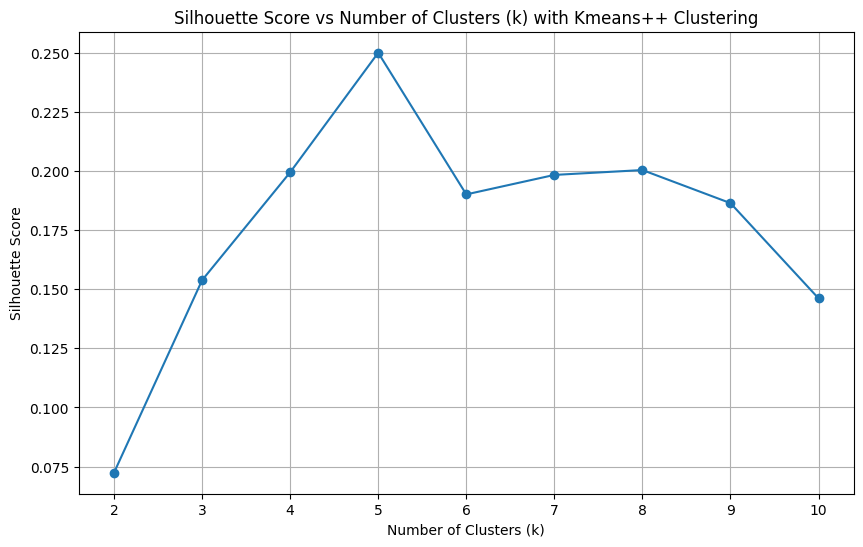

(5, 0.2500502118924104)

In [0]:
import matplotlib.pyplot as plt
# Extract the best silhouette scores for plotting
k_values_plot = [x[0] for x in silhouette_scores]
silhouette_scores_plot = [x[1] for x in silhouette_scores]

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values_plot, silhouette_scores_plot, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters (k) with Kmeans++ Clustering')
plt.grid(True)

plt.show()

best_k, best_silhouette_score

In [0]:
# kmeans = KMeans(featuresCol='features', k=best_k)
kmeans = KMeans(featuresCol='scaledFeatures', k=5, initMode='k-means||')

model = kmeans.fit(themes_tfidf_df)
predictions = model.transform(themes_tfidf_df)


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

In [0]:
#Assign predictions to the themes_df
# themes_df = themes_df.withColumn("Cluster", predictions["prediction"])
themes_df = themes_df.join(predictions, on="Theme", how="inner").withColumn("Cluster", predictions["prediction"])
display(themes_df)
# themes_df.show()

Theme,word_len,word_len,words,bigrams,trigrams,rawFeatures,features,scaledFeatures,prediction,Cluster
adoption of gen-ai in retail industry,6,6,"List(adoption, of, gen-ai, in, retail, industry)","List(adoption of, of gen-ai, gen-ai in, in retail, retail industry)","List(adoption of gen-ai, of gen-ai in, gen-ai in retail, in retail industry)","Map(vectorType -> sparse, length -> 20, indices -> List(0, 10, 13, 15), values -> List(1.0, 1.0, 2.0, 1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(0, 10, 13, 15), values -> List(1.8144877203056111, 1.6264354888026713, 3.6289754406112222, 2.137261112568662))","Map(vectorType -> sparse, length -> 20, indices -> List(0, 10, 13, 15), values -> List(2.3611021048667715, 2.037223545951464, 4.409039077284686, 2.750424930744344))",1,1
adoption of generative ai in marketing,6,6,"List(adoption, of, generative, ai, in, marketing)","List(adoption of, of generative, generative ai, ai in, in marketing)","List(adoption of generative, of generative ai, generative ai in, ai in marketing)","Map(vectorType -> sparse, length -> 20, indices -> List(0, 1, 10, 12, 13), values -> List(1.0, 1.0, 1.0, 1.0, 1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(0, 1, 10, 12, 13), values -> List(1.8144877203056111, 1.5441973905656994, 1.6264354888026713, 2.0462893343629354, 1.8144877203056111))","Map(vectorType -> sparse, length -> 20, indices -> List(0, 1, 10, 12, 13), values -> List(2.3611021048667715, 2.0462396668507696, 2.037223545951464, 3.022496297924572, 2.204519538642343))",1,1
advantages and challenges of adopting generative ai,7,7,"List(advantages, and, challenges, of, adopting, generative, ai)","List(advantages and, and challenges, challenges of, of adopting, adopting generative, generative ai)","List(advantages and challenges, and challenges of, challenges of adopting, of adopting generative, adopting generative ai)","Map(vectorType -> sparse, length -> 20, indices -> List(1, 3, 4, 7, 8, 13), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(1, 3, 4, 7, 8, 13), values -> List(1.5441973905656994, 1.5708656376478607, 1.8144877203056111, 1.7805861686299298, 2.186051276738094, 1.8144877203056111))","Map(vectorType -> sparse, length -> 20, indices -> List(1, 3, 4, 7, 8, 13), values -> List(2.0462396668507696, 2.2804972658682847, 2.58942516520205, 2.3373801989230985, 2.6393201271260356, 2.204519538642343))",3,3
advertising using generative ai,4,4,"List(advertising, using, generative, ai)","List(advertising using, using generative, generative ai)","List(advertising using generative, using generative ai)","Map(vectorType -> sparse, length -> 20, indices -> List(1, 11, 15), values -> List(1.0, 1.0, 1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(1, 11, 15), values -> List(1.5441973905656994, 1.8144877203056111, 2.137261112568662))","Map(vectorType -> sparse, length -> 20, indices -> List(1, 11, 15), values -> List(2.0462396668507696, 2.268036470599249, 2.750424930744344))",1,1
ai adoption in marketing,4,4,"List(ai, adoption, in, marketing)","List(ai adoption, adoption in, in marketing)","List(ai adoption in, adoption in marketing)","Map(vectorType -> sparse, length -> 20, indices -> List(6, 9, 13), values -> List(1.0, 1.0, 1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(6, 9, 13), values -> List(1.5982646118359751, 1.8859466842877561, 1.8144877203056111))","Map(vectorType -> sparse, length -> 20, indices -> List(6, 9, 13), values -> List(2.024053152104961, 2.5265800120671122, 2.204519538642343))",1,1
ai hallucination and its implications,5,5,"List(ai, hallucination, and, its, implications)","List(ai hallucination, hallucination and, and its, its implications)","List(ai hallucination and, hallucination and its, and its implications)","Map(vectorType -> sparse, length -> 20, indices -> List(7, 10, 12, 18), values -> List(1.0, 1.0, 1.0, 1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(7, 10

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

In [0]:
# Write themes_df to an excel file
# Write the cleaned dataframe to a local Excel file
local_path = '/tmp/fads_rq1_clustered_themes_kmeans_bigram.xlsx'
themes_df.toPandas().to_excel(local_path, index=False)

# Move the local file to the desired location using Databricks utilities
dbutils.fs.mv(f'file:{local_path}', '/Volumes/cmidev/default/preventech/data/user_files/gf591/ML/fads/fads_rq1_clustered_themes_kmeans_bigram.xlsx')

True

## Gen-AI Use Cases Clustering

In [0]:
usecases_df.columns

['GenAI_UseCase']

In [0]:
from pyspark.ml.feature import Tokenizer, HashingTF, IDF, NGram, MinMaxScaler, StandardScaler
from pyspark.ml import Pipeline
from pyspark.sql.functions import col, when, size

# Tokenize the Theme column
tokenizer = Tokenizer(inputCol="GenAI_UseCase", outputCol="words")

# Generate bi-grams and tri-grams
unigrams = NGram(n=1, inputCol="words", outputCol="unigrams")
# bigrams = NGram(n=2, inputCol="words", outputCol="bigrams")
# trigrams = NGram(n=3, inputCol="words", outputCol="trigrams")

# Apply HashingTF to get term frequency vectors
hashingTF = HashingTF(inputCol="unigrams", outputCol="rawFeatures", numFeatures=20)

# Apply IDF to get TF-IDF vectors
idf = IDF(inputCol="rawFeatures", outputCol="features")

# Apply MinMaxScaler to scale the features
# scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")

# Apply standard scalar on features column
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

# Create a pipeline with tokenizer, ngram, hashingTF, idf, and scaler
pipeline = Pipeline(stages=[tokenizer, unigrams, hashingTF, idf, scaler])

# Fit the pipeline to the data
pipeline_model = pipeline.fit(usecases_df)

# Transform the data
usecases_tfidf_df = pipeline_model.transform(usecases_df)

# Display the transformed DataFrame
display(usecases_tfidf_df)

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

GenAI_UseCase,words,unigrams,rawFeatures,features,scaledFeatures
active feedback loop,"List(active, feedback, loop)","List(active, feedback, loop)","Map(vectorType -> sparse, length -> 20, indices -> List(0, 14, 19), values -> List(1.0, 1.0, 1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(0, 14, 19), values -> List(2.2626684855886032, 2.833213344056216, 2.833213344056216))","Map(vectorType -> sparse, length -> 20, indices -> List(0, 14, 19), values -> List(3.3257489473208977, 4.393504821368086, 4.393504821368086))"
advertise,List(advertise),List(advertise),"Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.6369625858241905))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(2.221362890883584))"
advertise,List(advertise),List(advertise),"Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.6369625858241905))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(2.221362890883584))"
advertise,List(advertise),List(advertise),"Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.6369625858241905))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(2.221362890883584))"
ai - assist design process,"List(ai, -, assist, design, process)","List(ai, -, assist, design, process)","Map(vectorType -> sparse, length -> 20, indices -> List(0, 2, 10, 12, 13), values -> List(1.0, 1.0, 1.0, 1.0, 1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(0, 2, 10, 12, 13), values -> List(2.2626684855886032, 1.6369625858241905, 2.0308668715312788, 1.303818139295652, 1.4861396960896067))","Map(vectorType -> sparse, length -> 20, indices -> List(0, 2, 10, 12, 13), values -> List(3.3257489473208977, 2.221362890883584, 2.7059542586392755, 1.988558870675071, 2.1888740144361867))"
ai - assist design process in fashion industry,"List(ai, -, assist, design, process, in, fashion, industry)","List(ai, -, assist, design, process, in, fashion, industry)","Map(vectorType -> sparse, length -> 20, indices -> List(0, 2, 3, 10, 12, 13), values -> List(1.0, 2.0, 1.0, 2.0, 1.0, 1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(0, 2, 3, 10, 12, 13), values -> List(2.2626684855886032, 3.273925171648381, 1.1077032603693617, 4.0617337430625575, 1.303818139295652, 1.4861396960896067))","Map(vectorType -> sparse, length -> 20, indices -> List(0, 2, 3, 10, 12, 13), values -> List(3.3257489473208977, 4.442725781767168, 1.9474358262159044, 5.411908517278551, 1.988558870675071, 2.1888740144361867))"
ai - generate content for personalized advertising,"List(ai, -, generate, content, for, personalized, advertising)","List(ai, -, generate, content, for, personalized, advertising)","Map(vectorType -> sparse, length -> 20, indices -> List(4, 10, 11, 12, 13, 18, 19), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(4, 10, 11, 12, 13, 18, 19), values -> List(1.6604930832343845, 2.0308668715312788, 1.9016551400512727, 1.303818139295652, 1.4861396960896067, 1.2872888373444415, 2.833213344056216))","Map(vectorType -> sparse, length -> 20, indices -> List(4, 10, 11, 12, 13, 18, 19), values -> List(2.2361840133047246, 2.7059542586392755, 2.317463856197081, 1.988558870675071, 2.1888740144361867, 2.240256681721985, 4.393504821368086))"
ai - generate fashion product,"List(ai, -, generate, fashion, product)","List(ai, -, generate, fashion, product)","Map(vectorType -> sparse, length -> 20, indices -> List(2, 7, 10, 12, 13), values -> List(1.0, 1.0, 1.0, 1.0, 1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(2, 7, 10, 12, 13), values -> List(1.6369625858241905, 1.591500211747433, 2.0308668715312

In [0]:


# Define hyperparameters
k_values = range(2, 11)
silhouette_scores = []

# Evaluate KMeans++ for different values of k
for k in k_values:
    kmeans = KMeans(featuresCol='scaledFeatures', k=k, initMode='k-means||')
    model = kmeans.fit(usecases_tfidf_df)
    predictions = model.transform(usecases_tfidf_df)
    
    evaluator = ClusteringEvaluator(featuresCol='scaledFeatures', metricName='silhouette', distanceMeasure='squaredEuclidean')
    silhouette_score = evaluator.evaluate(predictions)
    silhouette_scores.append((k, silhouette_score))

# Extract the best silhouette score and corresponding k
best_k, best_silhouette_score = max(silhouette_scores, key=lambda x: x[1])

# Display the silhouette scores
display(silhouette_scores)

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

_1,_2
2,0.15824956865646894
3,0.17980635535884817
4,0.3288520205606065
5,0.15042470262789975
6,0.121400040860956
7,0.12876642899018487
8,0.1684174613204297
9,0.13443291333604626
10,0.1721745834171507


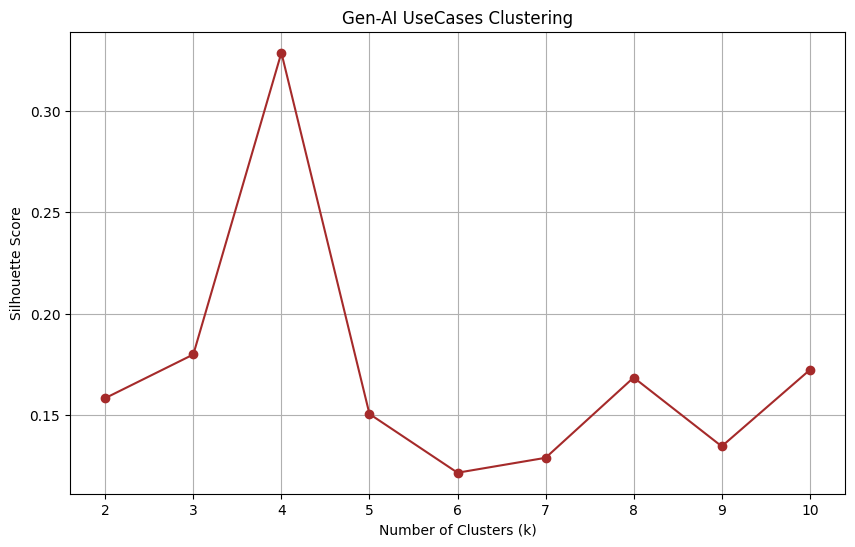

In [0]:
import matplotlib.pyplot as plt

# Extract the best silhouette scores for plotting
k_values_plot = [x[0] for x in silhouette_scores]
silhouette_scores_plot = [x[1] for x in silhouette_scores]

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values_plot, silhouette_scores_plot, marker='o', color='brown')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Gen-AI UseCases Clustering')
plt.grid(True)

plt.show()

In [0]:
# kmeans = KMeans(featuresCol='features', k=best_k)
kmeans = KMeans(featuresCol='scaledFeatures', k=best_k, initMode='k-means||')

model = kmeans.fit(usecases_tfidf_df)
predictions_uc = model.transform(usecases_tfidf_df)

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

In [0]:
usecases_tfidf_df = usecases_tfidf_df.join(predictions_uc, on="GenAI_UseCase", how="inner").withColumn("Cluster", predictions_uc["prediction"])
display(usecases_tfidf_df)


GenAI_UseCase,words,unigrams,rawFeatures,features,scaledFeatures,words,unigrams,rawFeatures,features,scaledFeatures,prediction,Cluster
advertise,List(advertise),List(advertise),"Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.6369625858241905))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(2.221362890883584))",List(advertise),List(advertise),"Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.6369625858241905))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(2.221362890883584))",0,0
advertise,List(advertise),List(advertise),"Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.6369625858241905))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(2.221362890883584))",List(advertise),List(advertise),"Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.6369625858241905))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(2.221362890883584))",0,0
advertise,List(advertise),List(advertise),"Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.6369625858241905))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(2.221362890883584))",List(advertise),List(advertise),"Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.6369625858241905))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(2.221362890883584))",0,0
advertise,List(advertise),List(advertise),"Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.6369625858241905))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(2.221362890883584))",List(advertise),List(advertise),"Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.6369625858241905))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(2.221362890883584))",0,0
advertise,List(advertise),List(advertise),"Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.6369625858241905))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(2.221362890883584))",List(advertise),List(advertise),"Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.6369625858241905))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(2.221362890883584))",0,0
advertise,List(advertise),List(advertise),"Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.6369625858241905))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(2.221362890883584))",List(advertise),List(advertise),"Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.6369625858241905))","Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(2.221362890883584))",0,0
advertise,List(advertise),List(advertise),"Map(vectorType -> 

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.